In [63]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
VARIANT_NUMBER = 11

In [66]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

5


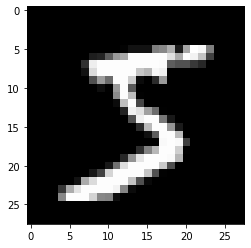

In [67]:
plt.imshow(X_train[0], cmap="gray")
print(y_train[0])

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=VARIANT_NUMBER)

dim = 28*28
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)

In [69]:
# уменьшим размерность
from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')
modelPCA = pca.fit(X_train) 
X_train = modelPCA.transform(X_train)

In [70]:
# доля объясненной дисперсии
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.097, 0.168, 0.229, 0.283, 0.332, 0.375, 0.408, 0.437, 0.465,
       0.488, 0.509, 0.53 , 0.547, 0.564, 0.58 , 0.594, 0.608, 0.62 ,
       0.632, 0.644, 0.654, 0.665, 0.674, 0.683, 0.692, 0.7  , 0.708,
       0.716, 0.724, 0.731, 0.737, 0.744, 0.75 , 0.756, 0.761, 0.767,
       0.772, 0.777, 0.781, 0.786, 0.791, 0.795, 0.799, 0.803, 0.807,
       0.811, 0.815, 0.818, 0.821, 0.825, 0.828, 0.831, 0.834, 0.837,
       0.84 , 0.842, 0.845, 0.848, 0.85 , 0.853, 0.855, 0.857, 0.86 ,
       0.862, 0.864, 0.866, 0.868, 0.87 , 0.872, 0.874, 0.876, 0.878,
       0.88 , 0.881, 0.883, 0.885, 0.886, 0.888, 0.889, 0.891, 0.892,
       0.893, 0.895, 0.896, 0.898, 0.899, 0.9  , 0.901, 0.903, 0.904,
       0.905, 0.906, 0.907, 0.908, 0.91 , 0.911, 0.912, 0.913, 0.914,
       0.915, 0.916, 0.917, 0.918, 0.918, 0.919, 0.92 , 0.921, 0.922,
       0.923, 0.924, 0.924, 0.925, 0.926, 0.927, 0.928, 0.928, 0.929,
       0.93 , 0.931, 0.931, 0.932, 0.933, 0.933, 0.934, 0.935, 0.935,
       0.936, 0.937,

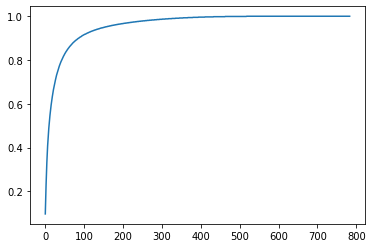

In [71]:
plt.plot(np.arange(len(explained_variance)), explained_variance, ls = '-')

In [72]:
var = round(0.80 + (VARIANT_NUMBER % 10) / 100, 2)
print(var)
dimensions = -1
for k, v in enumerate(explained_variance):
    if v > var:
        dimensions = k + 1
        break
print("Dimension:", dimensions)

0.81
Dimension: 46


In [73]:
pca = PCA(n_components=dimensions, svd_solver='full')
modelPCA = pca.fit(X_train) 

X_train = modelPCA.transform(X_train)

In [62]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=VARIANT_NUMBER)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

In [74]:
# применим полученное раннее преобразование к тестовым данным
modelPCA = pca.fit(X_test) 
X_test_transf = modelPCA.transform(X_test)

In [75]:
y_pred = clf.predict(X_test_transf)

In [76]:
from sklearn.metrics import confusion_matrix
m_confusion = confusion_matrix(y_test, y_pred)
print(m_confusion)

[[ 654    0  101   42   14  118   57    3  197    6]
 [   5 1106   43   24   42   16   27    4   60   14]
 [  89    2  783   50   56   28   61   22   52   10]
 [  70    5   58  839   13  110   11   29   71    3]
 [   8   10   45   10  701   35   21   65   33  173]
 [  81    3   78  180   53  471   35    3  134   62]
 [  75    5  141   18   11   49  842   13   18   10]
 [   3   33   32   26   75   14    3  870   55  190]
 [ 212   17   61  154   27  163   11   67  474   54]
 [  15   24   23   23  300   85   12  326   70  303]]


In [77]:
# количество объектов класса 2 отнесенных ко 2 классу
# second 2 -> count of predicted 2s
cl = VARIANT_NUMBER % 9
print(cl)
m_confusion[cl][cl]


2


783

Predicted class: 7
True class: 7


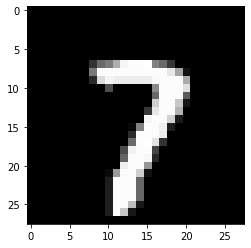

In [78]:
from random import sample
index = sample(range(len(X_test_transf)), k=1)[0]
obj = X_test[index].reshape(28, 28)
plt.imshow(obj, cmap="gray")
print(f"Predicted class: {y_pred[index]}")
print(f"True class: {y_test[index]}")

In [79]:
from random import sample
indexes = sample(range(len(X_test)), k=5)
print(indexes)
test_objects = [X_test_transf[i] for i in indexes]
for number, proba in zip(indexes, clf.predict_proba(test_objects)):
    print(f"Image #{number}: class={y_pred[number]}, proba={round(max(proba), 4)}")

[11600, 11476, 6170, 11796, 864]
Image #11600: class=3, proba=0.4128
Image #11476: class=1, proba=0.3231
Image #6170: class=4, proba=0.5541
Image #11796: class=5, proba=0.3907
Image #864: class=3, proba=0.4138


Метрики для классификатора

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.54      0.55      0.54      1192
           1       0.92      0.82      0.87      1341
           2       0.57      0.68      0.62      1153
           3       0.61      0.69      0.65      1209
           4       0.54      0.64      0.59      1101
           5       0.43      0.43      0.43      1100
           6       0.78      0.71      0.74      1182
           7       0.62      0.67      0.64      1301
           8       0.41      0.38      0.39      1240
           9       0.37      0.26      0.30      1181

    accuracy                           0.59     12000
   macro avg       0.58      0.58      0.58     12000
weighted avg       0.58      0.59      0.58     12000

